In [1]:
import pandas as pd

# Specify the path to your CSV file
file_path = "C:/Users/Mila/Desktop/Balkan/n_nije_mutacija/sve_povezane_informacije_izmenjeno.csv"

# Read the CSV file into a pandas DataFrame
df = pd.read_csv(file_path)

# Sort the DataFrame by the "Collection date" column
df_sorted = df.sort_values(by="Collection date")

# Specify the path for the sorted CSV file
sorted_file_path = "C:/Users/Mila/Desktop/Balkan/n_nije_mutacija/sve_povezane_informacije_izmenjeno_sorted.csv"

# Save the sorted DataFrame to a new CSV file
df_sorted.to_csv(sorted_file_path, index=False)

print(f"The file has been sorted by the 'Collection date' column and saved to {sorted_file_path}.")

The file has been sorted by the 'Collection date' column and saved to C:/Users/Mila/Desktop/Balkan/n_nije_mutacija/sve_povezane_informacije_izmenjeno_sorted.csv.


C:\Users\Mila\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


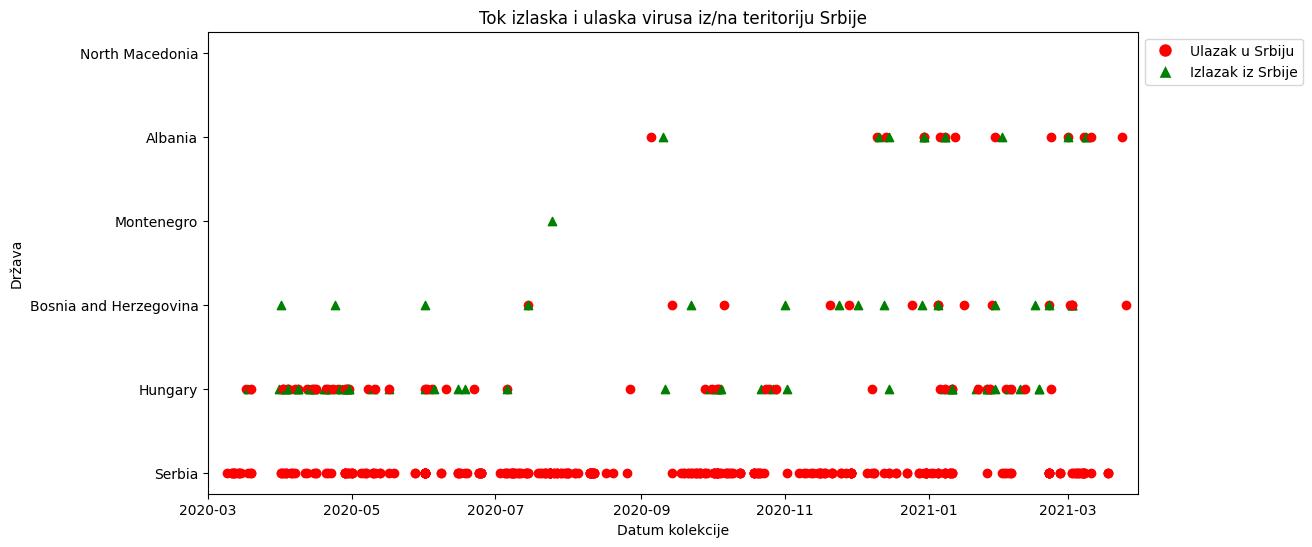

In [3]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Učitaj podatke
data = pd.read_csv('C:/Users/Mila/Desktop/Balkan/n_nije_mutacija/sve_povezane_informacije_izmenjeno_sorted.csv')

# Convert 'Collection date' to datetime
data['Collection date'] = pd.to_datetime(data['Collection date'], format='mixed')

# Izdvoj podatke o mutacijama
mutations_data = data.iloc[:, 4:].values

# Zamena NaN vrednosti nulama
mutations_data = np.nan_to_num(mutations_data)

# Definiši broj klastera
num_clusters = 5

# Primena KMeans algoritma
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
clusters = kmeans.fit_predict(mutations_data)

# Dodaj informacije o klasterima u DataFrame
data['Cluster'] = clusters

# Inicijalizuj listu za prikazivanje toka izlaska/ulaska virusa iz/na teritoriju Srbije
flow_data = []

# Prikazi iz koje države virus ulazi ili izlazi iz Srbije za svaki klaster
for cluster_num in range(num_clusters):
    cluster_data = data[data['Cluster'] == cluster_num].sort_values(by='Collection date')

    prev_location = None
    for _, row in cluster_data.iterrows():
        if prev_location is not None:
            if prev_location == 'Serbia':
                flow_data.append(('Izlazak iz Srbije', row['Location'], row['Collection date']))
            elif row['Location'] == 'Serbia':
                flow_data.append(('Ulazak u Srbiju', prev_location, row['Collection date']))
        prev_location = row['Location']

# Sortiraj flow_data po datumu pre prikazivanja na grafikonu
flow_data = sorted(flow_data, key=lambda x: x[2])

# Prikaz dijagrama toka
fig, ax = plt.subplots(figsize=(12, 6))

for flow_type, location, date in flow_data:
    if flow_type == 'Izlazak iz Srbije':
        ax.scatter(date, location, color='red', marker='o')
    else:
        ax.scatter(date, location, color='green', marker='^')

ax.set_title('Tok izlaska i ulaska virusa iz/na teritoriju Srbije')
ax.set_xlabel('Datum kolekcije')
ax.set_ylabel('Država')

# Postavi opseg datuma na x-osi od marta 2020. do marta 2021.
ax.set_xlim(pd.Timestamp('2020-03-01'), pd.Timestamp('2021-03-31'))

# Ručno postavite legendu izvan grafikona
legend_labels = {'Izlazak iz Srbije': 'Ulazak u Srbiju', 'Ulazak u Srbiju': 'Izlazak iz Srbije'}
legend_handles = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='red', markersize=10),
                  plt.Line2D([0], [0], marker='^', color='w', markerfacecolor='green', markersize=10)]
ax.legend(legend_handles, legend_labels.values(), loc='upper left', bbox_to_anchor=(1, 1))

plt.show()


C:\Users\Mila\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


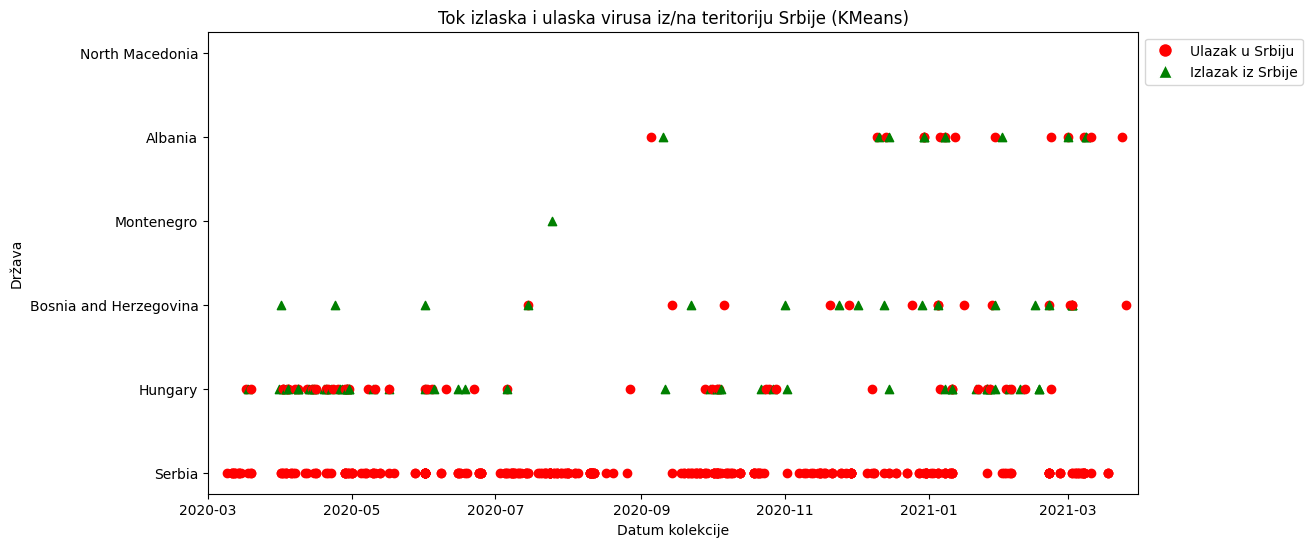

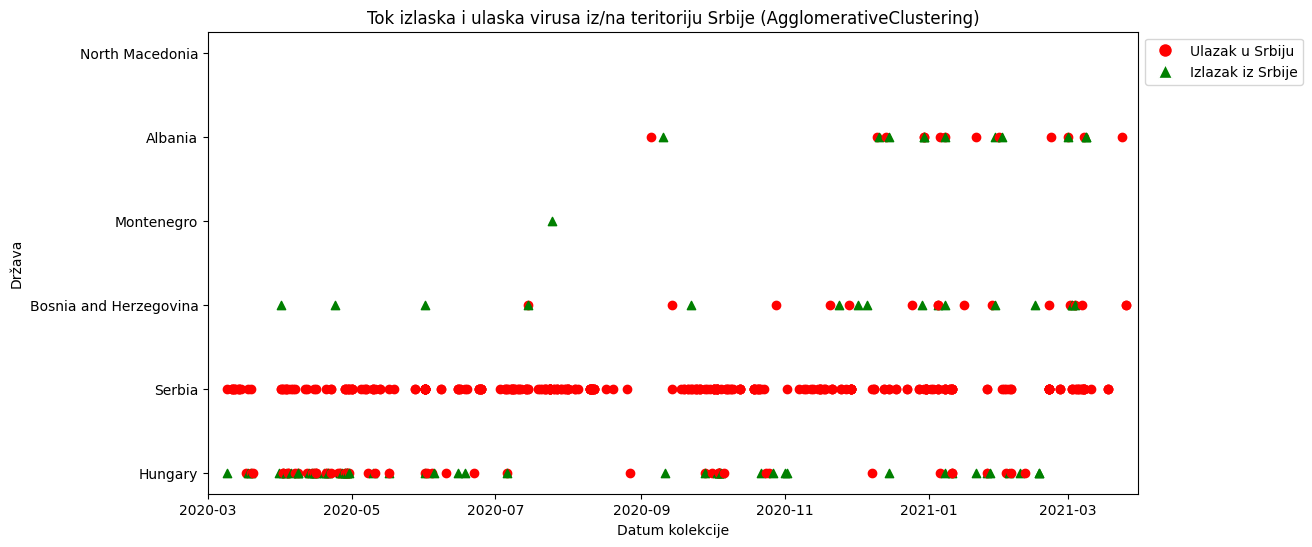

In [50]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
import matplotlib.pyplot as plt

# Učitaj podatke
data = pd.read_csv('C:/Users/Mila/Desktop/Balkan/n_nije_mutacija/sve_povezane_informacije_izmenjeno_sorted.csv')

# Convert 'Collection date' to datetime
data['Collection date'] = pd.to_datetime(data['Collection date'], format = 'mixed')

# Izdvoj podatke o mutacijama
mutations_data = data.iloc[:, 4:].values

# Zamena NaN vrednosti nulama
mutations_data = np.nan_to_num(mutations_data)

# Definiši broj klastera
num_clusters = 5

# Lista algoritama koje želimo testirati
algorithms = [KMeans, AgglomerativeClustering]

for algorithm in algorithms:
    # Primena algoritma klasterizacije
   
    clustering = algorithm(n_clusters=num_clusters)
    
    clusters = clustering.fit_predict(mutations_data)

    # Dodaj informacije o klasterima u DataFrame
    data['Cluster'] = clusters

    # Inicijalizuj listu za prikazivanje toka izlaska/ulaska virusa iz/na teritoriju Srbije
    flow_data = []

    # Prikazi iz koje države virus ulazi ili izlazi iz Srbije za svaki klaster
    for cluster_num in range(num_clusters):
        cluster_data = data[data['Cluster'] == cluster_num].sort_values(by='Collection date')

        prev_location = None
        for _, row in cluster_data.iterrows():
            if prev_location is not None:
                if prev_location == 'Serbia':
                    flow_data.append(('Izlazak iz Srbije', row['Location'], row['Collection date']))
                elif row['Location'] == 'Serbia':
                    flow_data.append(('Ulazak u Srbiju', prev_location, row['Collection date']))
            prev_location = row['Location']

    # Sortiraj flow_data po datumu pre prikazivanja na grafikonu
    flow_data = sorted(flow_data, key=lambda x: x[2])

    # Prikaz dijagrama toka
    fig, ax = plt.subplots(figsize=(12, 6))

    for flow_type, location, date in flow_data:
        if flow_type == 'Izlazak iz Srbije':
            ax.scatter(date, location, color='red', marker='o')
        else:
            ax.scatter(date, location, color='green', marker='^')

    ax.set_title(f'Tok izlaska i ulaska virusa iz/na teritoriju Srbije ({algorithm.__name__})')
    ax.set_xlabel('Datum kolekcije')
    ax.set_ylabel('Država')

    # Sortiraj flow_data po datumu pre prikazivanja na grafikonu
    flow_data = sorted(flow_data, key=lambda x: x[2])

    # Izračunaj korak za prikaz datuma
    num_dates = len(flow_data)
    step_size = max(1, num_dates // 10)  # Set a minimum step size of 1

    # Postavi opseg datuma na x-osi od marta 2020. do marta 2021.
    ax.set_xlim(pd.Timestamp('2020-03-01'), pd.Timestamp('2021-03-31'))

    
    # Ručno postavite legendu izvan grafikona
    legend_labels = {'Izlazak iz Srbije': 'Ulazak u Srbiju', 'Ulazak u Srbiju': 'Izlazak iz Srbije'}
    legend_handles = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='red', markersize=10),
                      plt.Line2D([0], [0], marker='^', color='w', markerfacecolor='green', markersize=10)]
    ax.legend(legend_handles, legend_labels.values(), loc='upper left', bbox_to_anchor=(1, 1))

    plt.show()


C:\Users\Mila\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


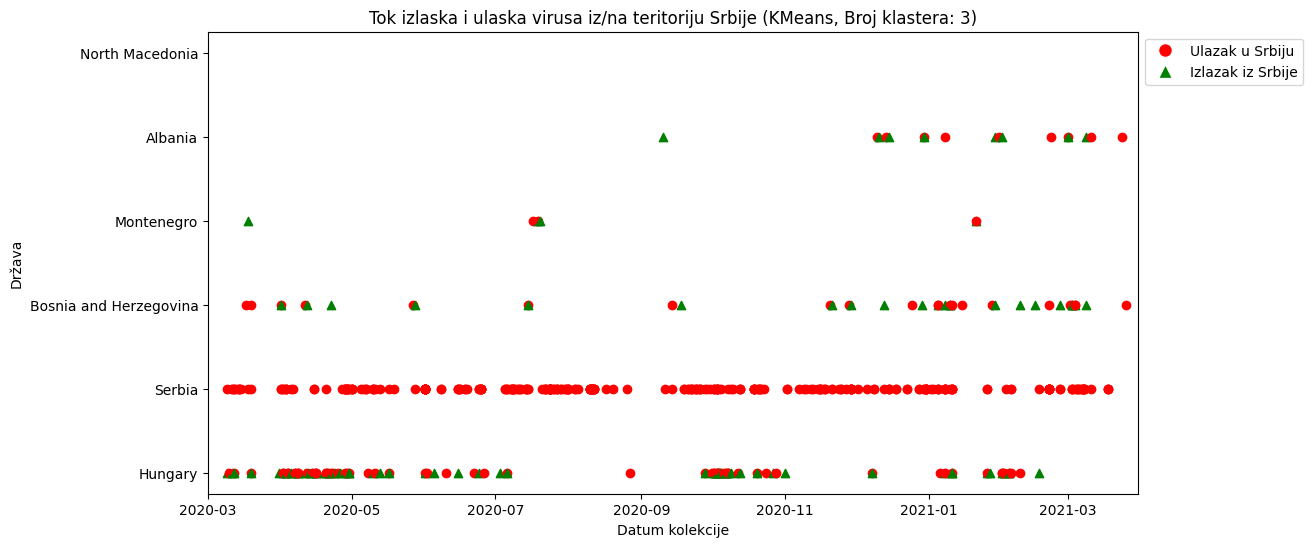

C:\Users\Mila\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


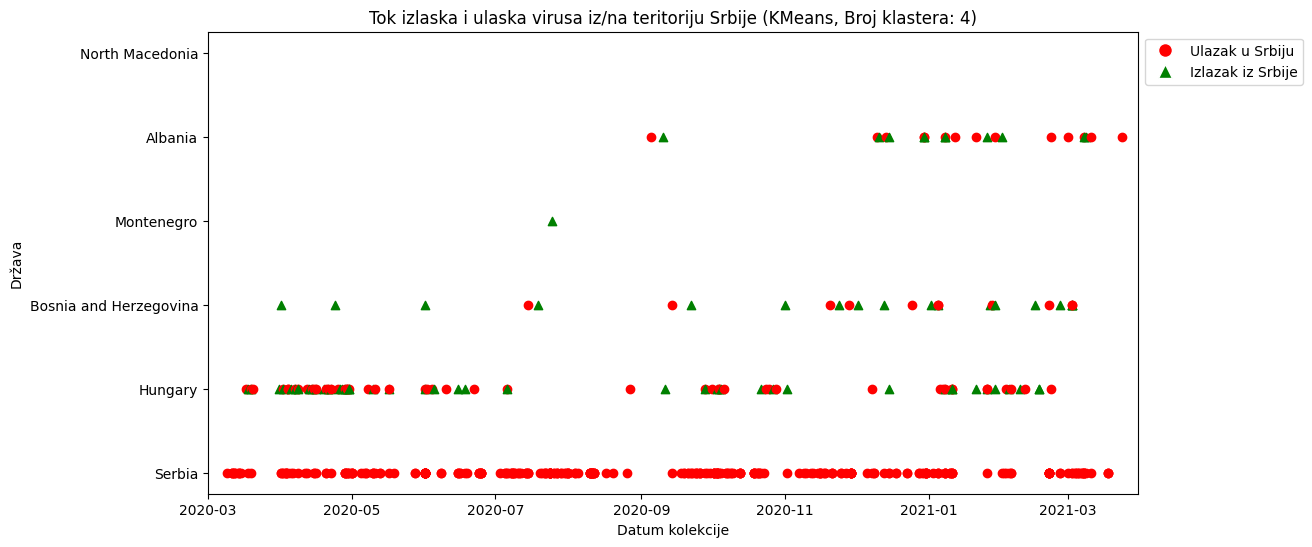

C:\Users\Mila\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


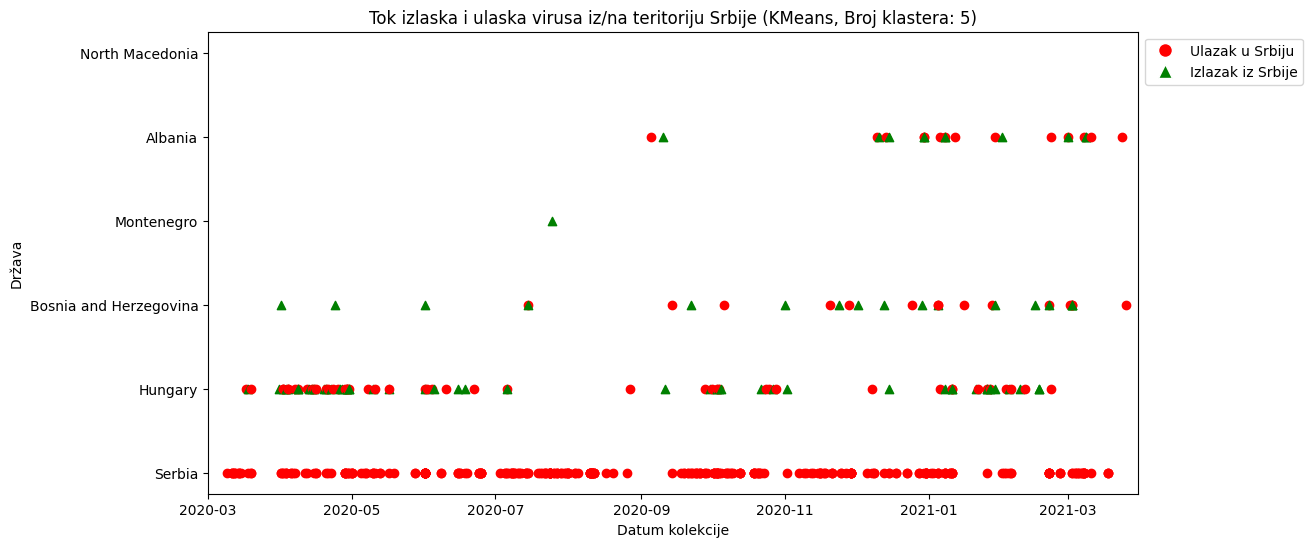

C:\Users\Mila\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


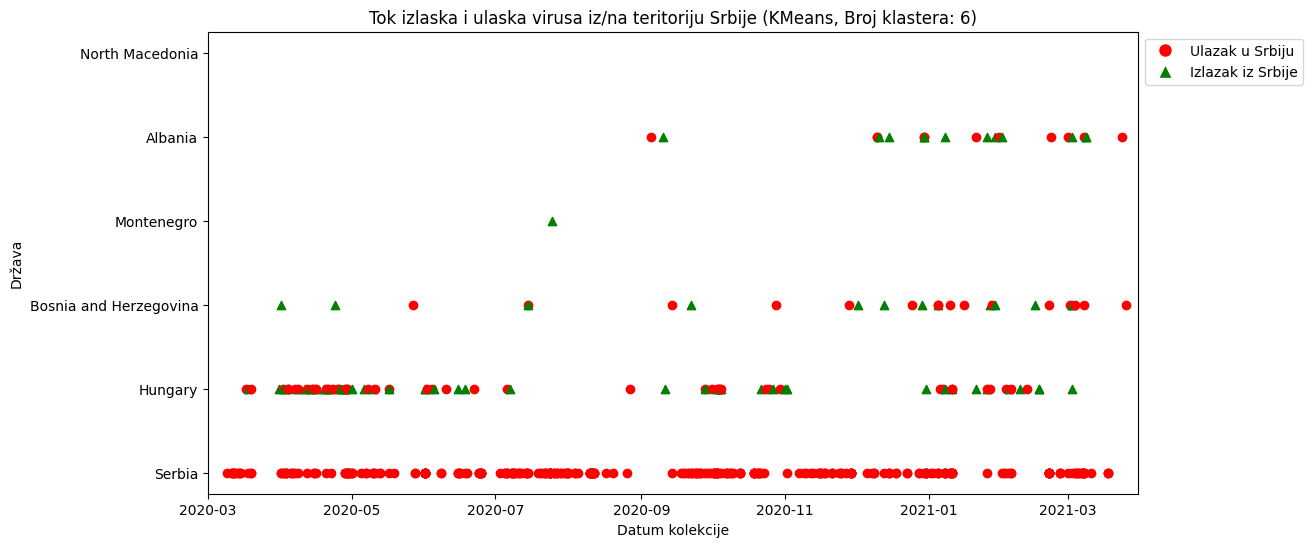

C:\Users\Mila\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


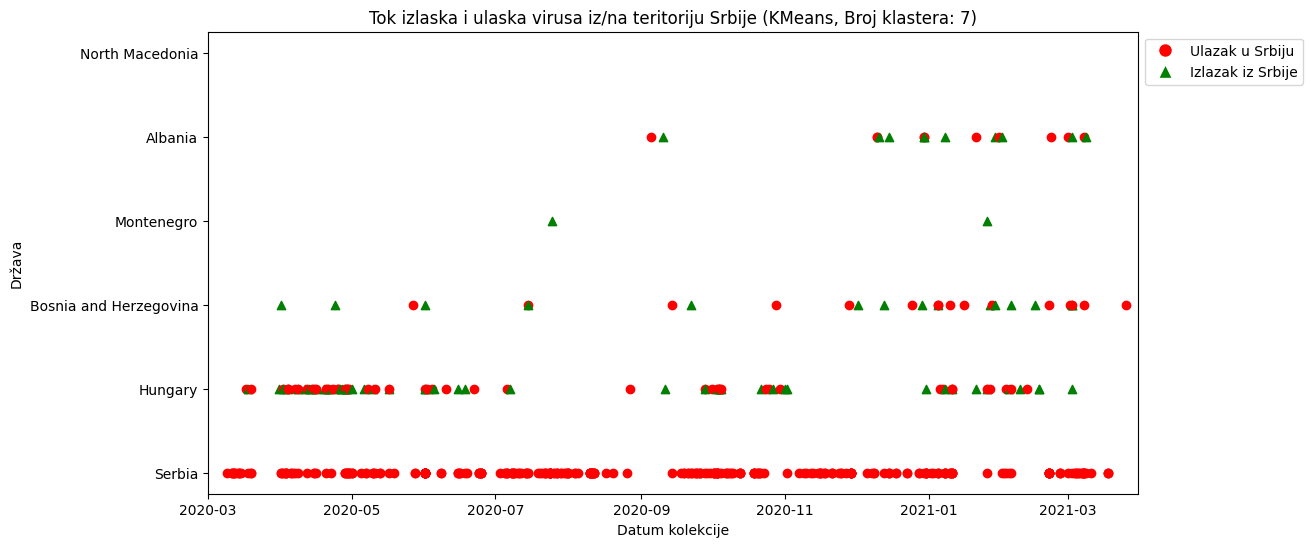

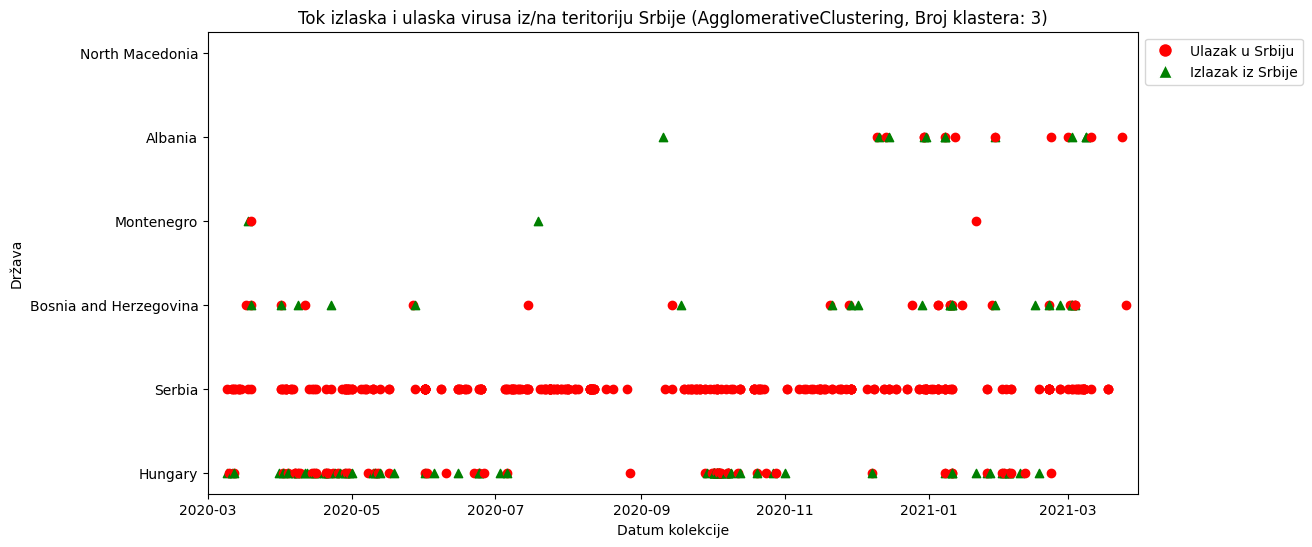

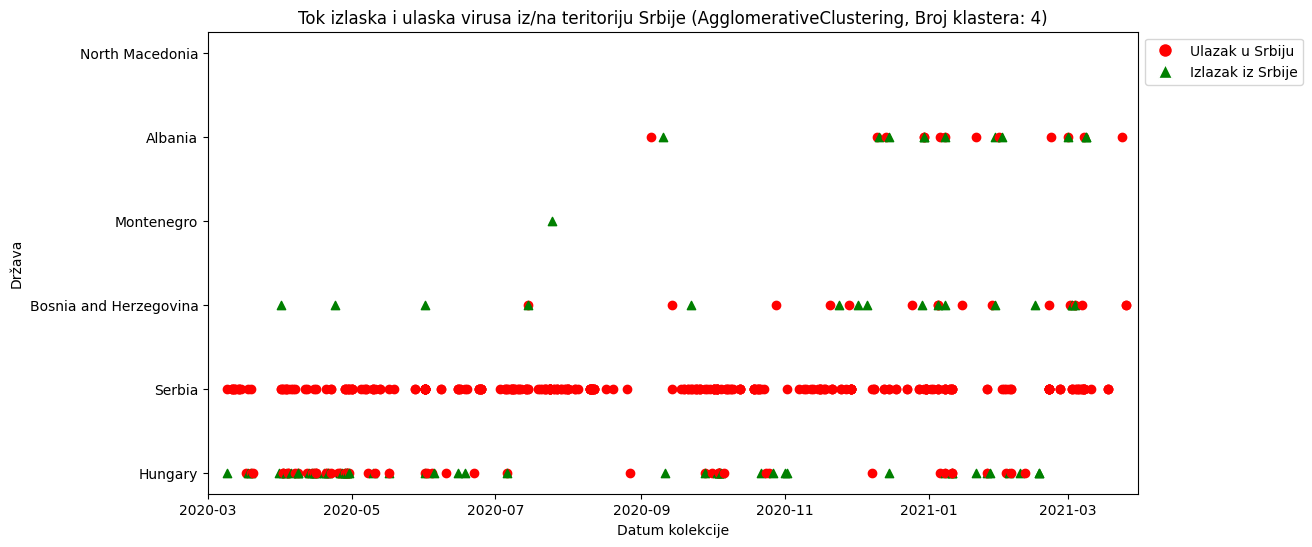

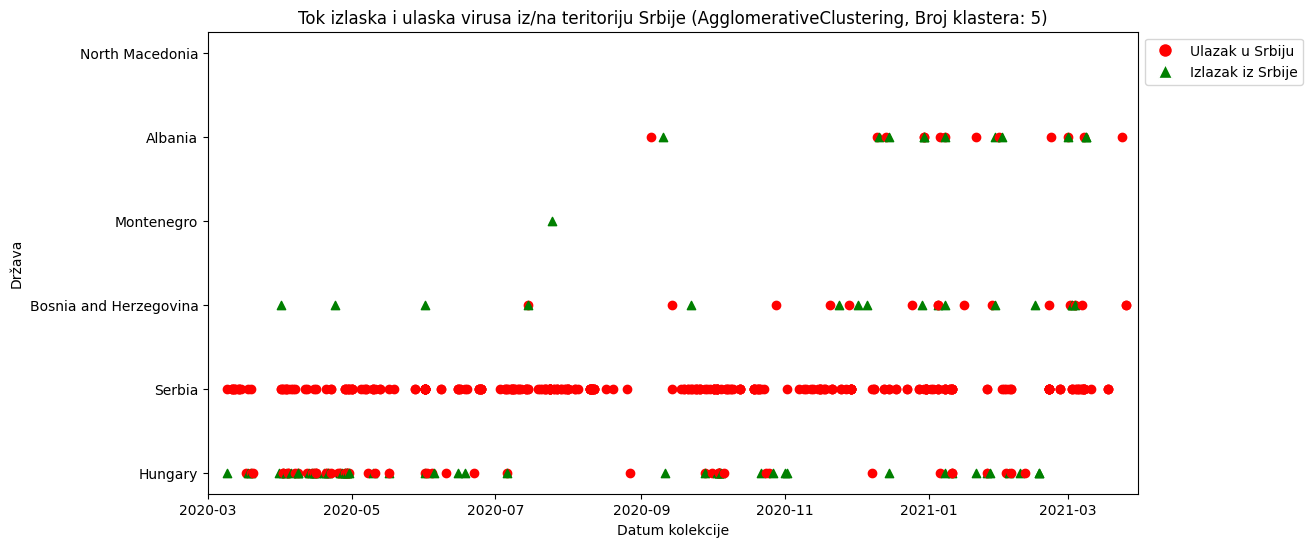

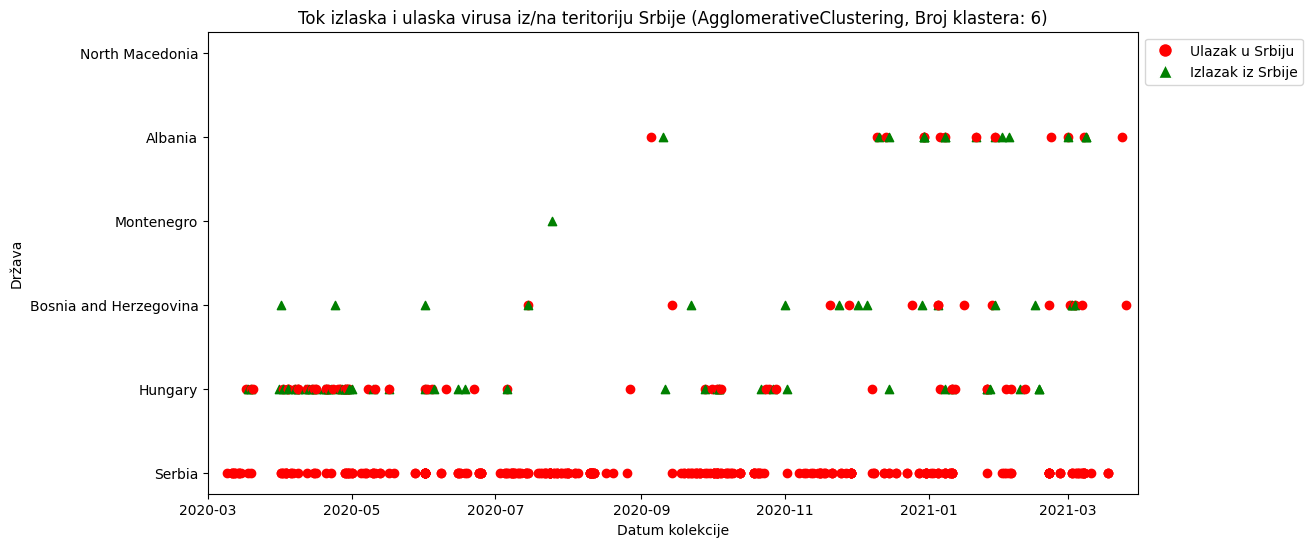

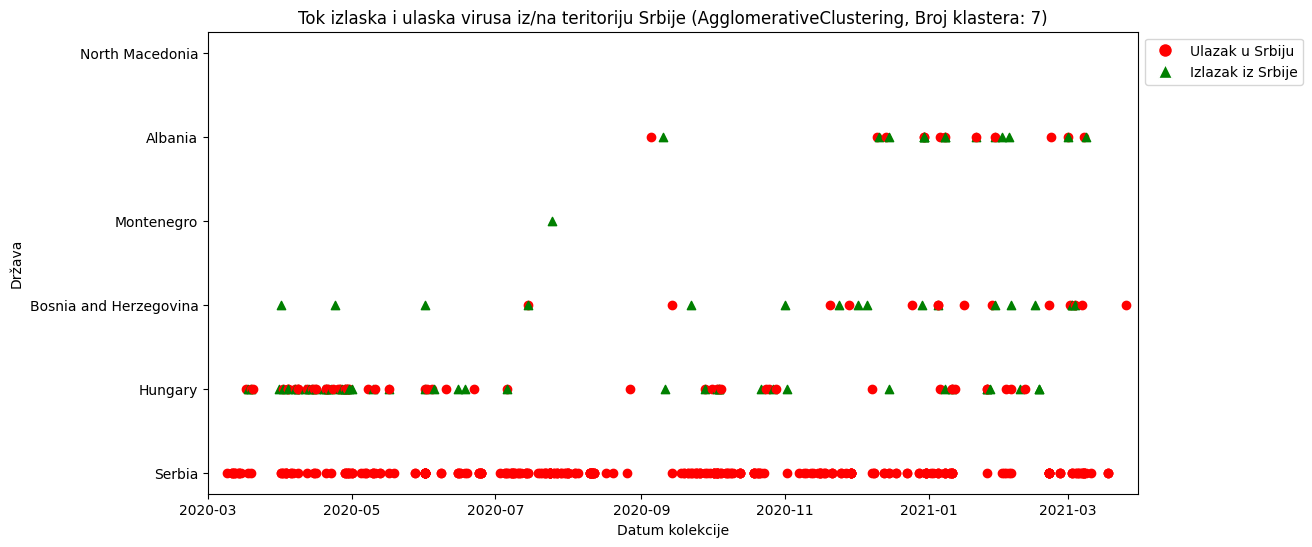

In [52]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans, AgglomerativeClustering
import matplotlib.pyplot as plt

# Učitaj podatke
data = pd.read_csv('C:/Users/Mila/Desktop/Balkan/n_nije_mutacija/sve_povezane_informacije_izmenjeno_sorted.csv')

# Convert 'Collection date' to datetime
data['Collection date'] = pd.to_datetime(data['Collection date'], format='mixed')

# Izdvoj podatke o mutacijama
mutations_data = data.iloc[:, 4:].values

# Zamena NaN vrednosti nulama
mutations_data = np.nan_to_num(mutations_data)

# Lista algoritama koje želimo testirati
algorithms = [KMeans, AgglomerativeClustering]

# Lista vrednosti broja klastera koje želimo testirati
num_clusters_values = [3, 4, 5, 6, 7]

# Iteracija kroz algoritme
for algorithm in algorithms:
    # Iteracija kroz vrednosti broja klastera
    for num_clusters in num_clusters_values:
        # Primena algoritma klasterizacije
        clustering = algorithm(n_clusters=num_clusters)
        clusters = clustering.fit_predict(mutations_data)

        # Dodaj informacije o klasterima u DataFrame
        data['Cluster'] = clusters

        # Inicijalizuj listu za prikazivanje toka izlaska/ulaska virusa iz/na teritoriju Srbije
        flow_data = []

        # Prikazi iz koje države virus ulazi ili izlazi iz Srbije za svaki klaster
        for cluster_num in range(num_clusters):
            cluster_data = data[data['Cluster'] == cluster_num].sort_values(by='Collection date')

            prev_location = None
            for _, row in cluster_data.iterrows():
                if prev_location is not None:
                    if prev_location == 'Serbia':
                        flow_data.append(('Izlazak iz Srbije', row['Location'], row['Collection date']))
                    elif row['Location'] == 'Serbia':
                        flow_data.append(('Ulazak u Srbiju', prev_location, row['Collection date']))
                prev_location = row['Location']

        # Sortiraj flow_data po datumu pre prikazivanja na grafikonu
        flow_data = sorted(flow_data, key=lambda x: x[2])

        # Prikaz dijagrama toka
        fig, ax = plt.subplots(figsize=(12, 6))

        for flow_type, location, date in flow_data:
            if flow_type == 'Izlazak iz Srbije':
                ax.scatter(date, location, color='red', marker='o')
            else:
                ax.scatter(date, location, color='green', marker='^')

        ax.set_title(f'Tok izlaska i ulaska virusa iz/na teritoriju Srbije ({algorithm.__name__}, Broj klastera: {num_clusters})')
        ax.set_xlabel('Datum kolekcije')
        ax.set_ylabel('Država')

        # Sortiraj flow_data po datumu pre prikazivanja na grafikonu
        flow_data = sorted(flow_data, key=lambda x: x[2])

        # Izračunaj korak za prikaz datuma
        num_dates = len(flow_data)
        step_size = max(1, num_dates // 10)  # Set a minimum step size of 1

            # Postavi opseg datuma na x-osi od marta 2020. do marta 2021.
        ax.set_xlim(pd.Timestamp('2020-03-01'), pd.Timestamp('2021-03-31'))

        # Ručno postavite legendu izvan grafikona
        legend_labels = {'Izlazak iz Srbije': 'Ulazak u Srbiju', 'Ulazak u Srbiju': 'Izlazak iz Srbije'}
        legend_handles = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='red', markersize=10),
                          plt.Line2D([0], [0], marker='^', color='w', markerfacecolor='green', markersize=10)]
        ax.legend(legend_handles, legend_labels.values(), loc='upper left', bbox_to_anchor=(1, 1))

        plt.show()